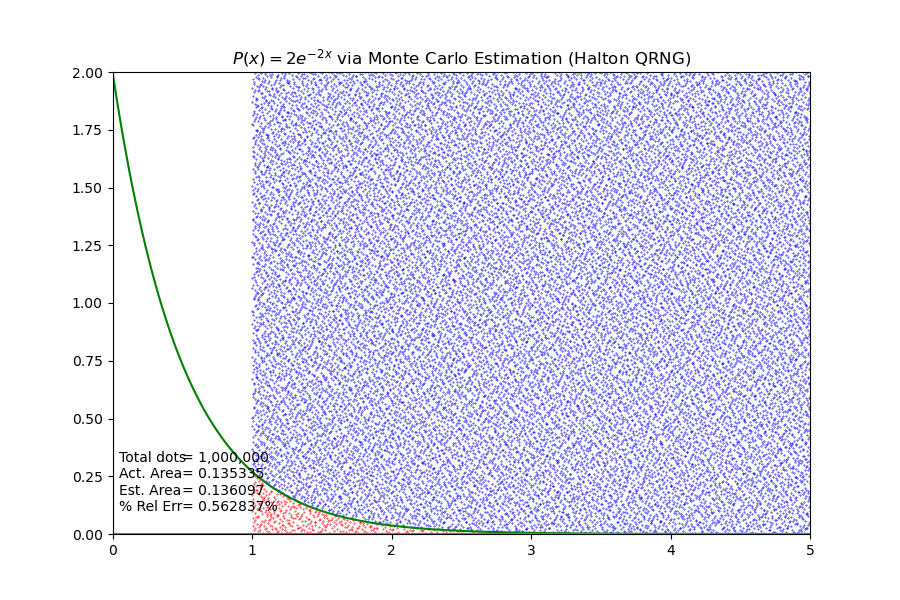

In [30]:
# particle_location.ipynb
# Cell 1 - Monte Carlo Estimation

# c = sqrt(2) nm

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, Rectangle
from numba import float64, int32, vectorize
from numpy.random import default_rng

rate_param = 1
sample_area = Rectangle((1,0), 1, np.inf)

@vectorize([float64(float64)], nopython=True)
# Defining the PDF
def pdf(x):
    return abs((np.sqrt(2)*np.exp(-x))**2)

def cdf():
    return np.exp(-2)

@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 19
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

def plot_std_normal(ax):
    iterations_sqrt = 1000
    iterations = iterations_sqrt**2

    primes = [2, 3]

    # Scaling our x-values so they are greater than 1
    x = halton(np.arange(iterations), primes[0]) + 1
    y = halton(np.arange(iterations), primes[1]) 

    # Actual minus random y value
    d = pdf(x) - y
    
    # Assigning based on location above and below the curve
    x_in = x[d >= 0.0]
    y_in = y[d >= 0.0]

    x_out = x[d < 0.0]
    y_out = y[d < 0.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    # Plotting actual function
    act_x = np.linspace(0, 5, 1000)
    act_y = pdf(act_x)
    ax.plot(act_x, act_y, color="green")

    est_area = np.count_nonzero(d >= 0.0) / iterations * 361

    act_area = cdf()

    err = (est_area - act_area) / act_area

    ax.set_title(r"$P(x) = 2e^{-2x} \mathrm{\ via\ Monte \ Carlo \ Estimation}$"
                  r"$\mathrm{\ (Halton \ QRNG)}$")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 2)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")

    ax.text(0.05, 0.1, "Total dots\nAct. Area\n" "Est. Area\n% Rel Err", ha="left")

    ax.text(
        0.5,
        0.1,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def main():
    plt.close("all")
    fig = plt.figure(label=" ")
    fig.set_size_inches(9, 6)
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])
    plot_std_normal(ax)

    plt.show()


main()

In [29]:
import scipy.integrate

def main():
    pdf_int = lambda x: 2*np.exp(-2*x)
    area = scipy.integrate.quad(pdf_int, 1, np.inf)
    error = (abs((area - cdf())/ cdf())) * 100
    # Note: Rounding causes calsulation to appear the same as estimate and error to be zero
    # So I let it print the entire term
    print(f"Scipy calculates an area of {area[0]} with an estimated error of {error[0]} %.")

    
main()

Scipy calculates an area of 0.13533528323661265 with an estimated error of 4.101750105639873e-14 %.
